### Required Librarys importing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data loading

In [2]:
df = pd.read_csv("LoanData.csv") 

# Data understandig

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum().sum()

149

In [9]:
df.duplicated().sum()

0

In [10]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [11]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
continus = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
count = df[['Loan_Amount_Term', 'Dependents']]
categorical = df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']]

In [13]:
for cols in count.columns:
    print(cols,'=======================')
    print(df[cols].value_counts())
    print()

Loan_Amount_Term =======================
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Dependents =======================
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64



In [14]:
for cols in categorical.columns:
    print(cols,'=======================')
    print(df[cols].value_counts())
    print()

Gender =======================
Male      489
Female    112
Name: Gender, dtype: int64

Married =======================
Yes    398
No     213
Name: Married, dtype: int64

Education =======================
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed =======================
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area =======================
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status =======================
Y    422
N    192
Name: Loan_Status, dtype: int64

Credit_History =======================
1.0    475
0.0     89
Name: Credit_History, dtype: int64



In [15]:
continus.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [16]:
continus.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

## Data Exploratory Analysis

### Univariate analysis

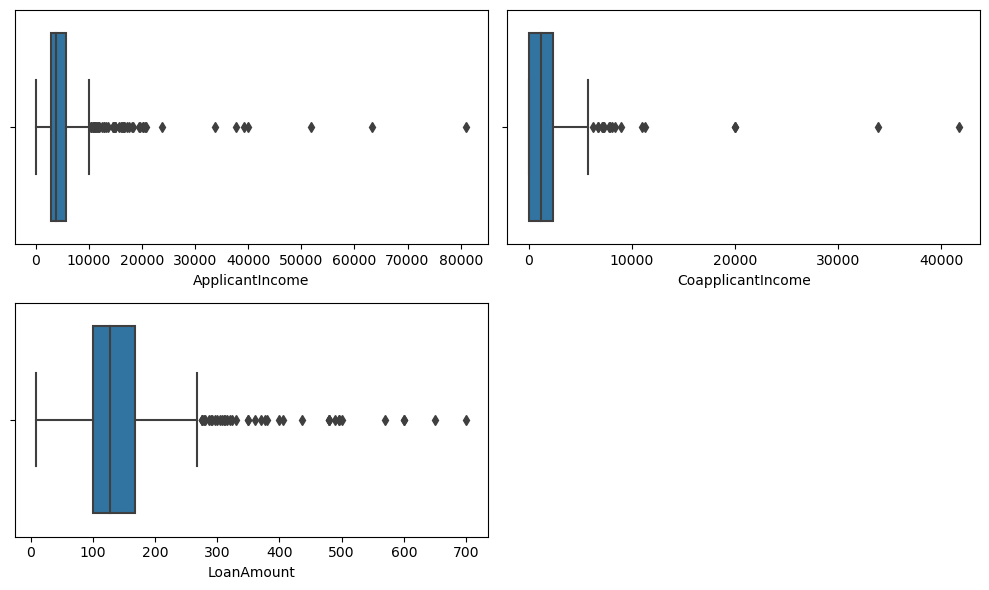

In [17]:
plt.figure(figsize=(10,6))
i = 1
for cols in continus.columns:
    plt.subplot(2,2,i);i += 1
    sns.boxplot(x = df[cols])
    plt.tight_layout()
plt.show()

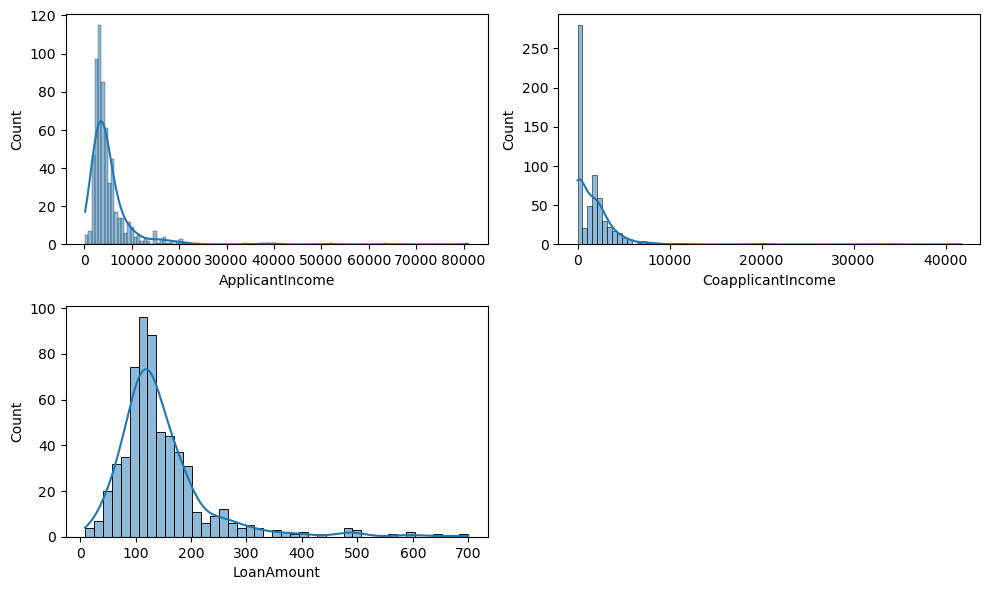

In [18]:
plt.figure(figsize=(10,6))
i = 1
for cols in continus.columns:
    plt.subplot(2,2,i);i += 1
    sns.histplot(x = df[cols], kde =True)
    plt.tight_layout()
plt.show()

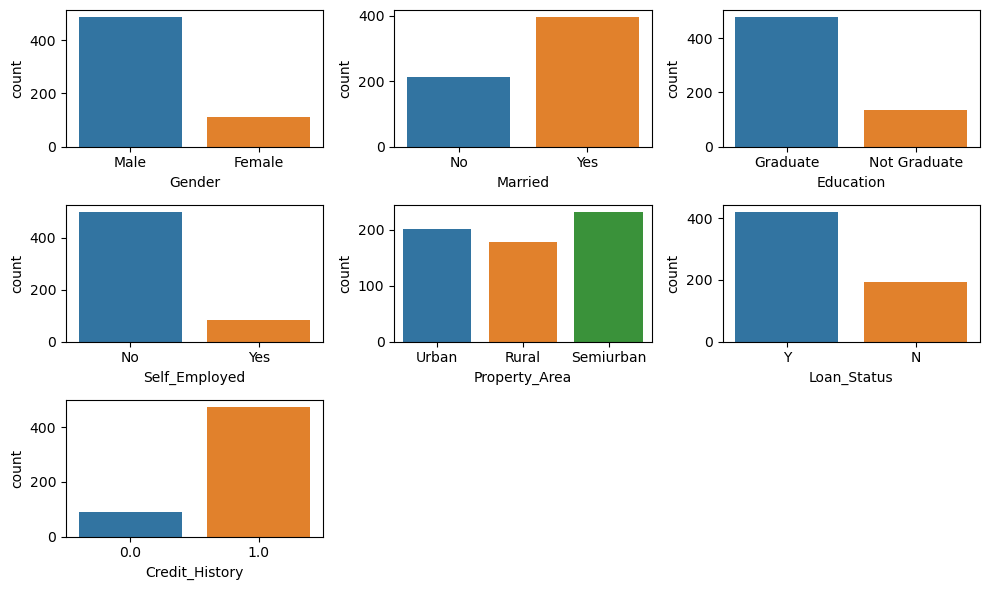

In [19]:
plt.figure(figsize=(10,6))
i = 1
for cols in categorical.columns:
    plt.subplot(3,3,i); i += 1
    sns.countplot(x = df[cols])
    plt.tight_layout()
plt.show()

## Bivaritae Analyze

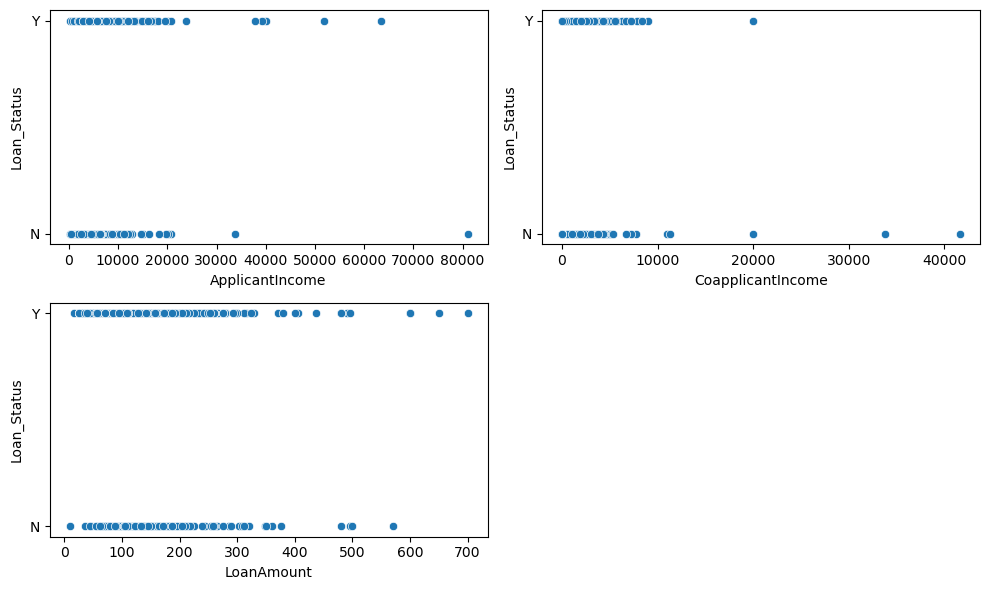

In [20]:
plt.figure(figsize=(10,6))
i = 1
for cols in continus.columns:
    plt.subplot(2,2,i);i += 1
    sns.scatterplot(x = df[cols], y = df.Loan_Status, data = df)
    plt.tight_layout()
plt.show()

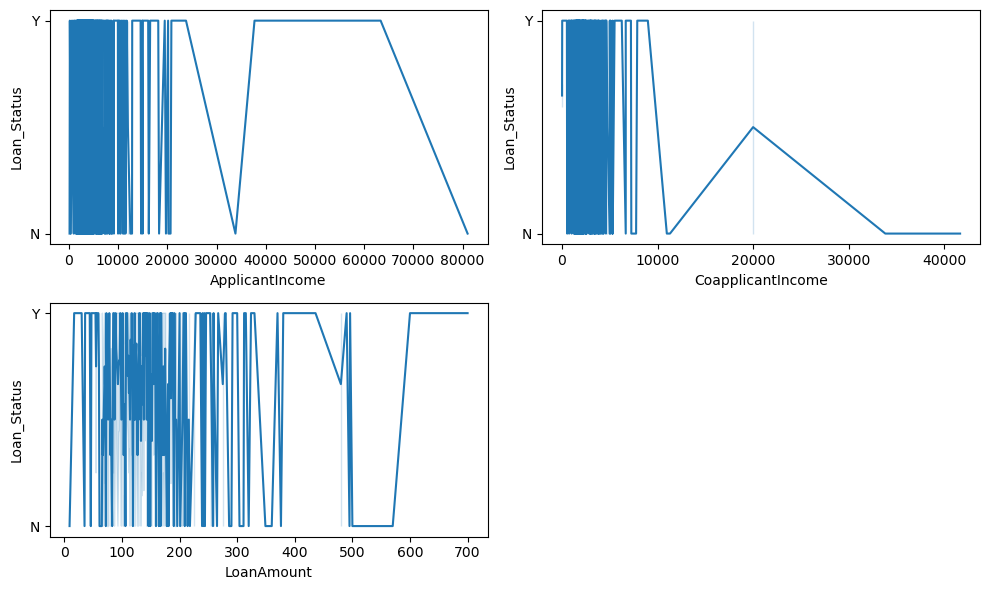

In [21]:
plt.figure(figsize=(10,6))
i = 1
for cols in continus.columns:
    plt.subplot(2,2,i);i += 1
    sns.lineplot(x = df[cols], y = df.Loan_Status, data = df)
    plt.tight_layout()
plt.show()

## Multivariate analyze

<Axes: >

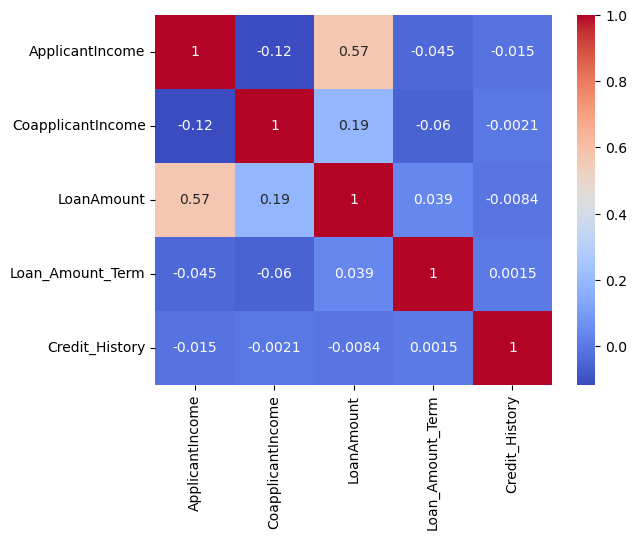

In [22]:
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

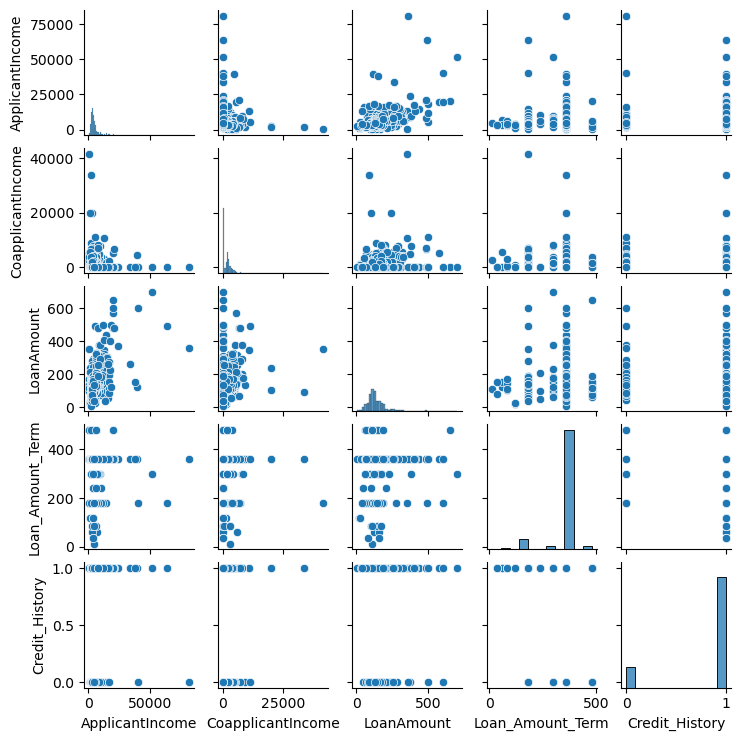

In [23]:
sns.pairplot(df, height= 1.5)

# Data Preprocessing

### obsarvation

* total 149 null value are there in my dataset
    - Gender               13
    - Married               3
    - Dependents           15
    - Self_Employed        32
    - LoanAmount           22
    - Loan_Amount_Term     14
    - Credit_History       50

* (LoanAmount , Loan_Amount_Term) in these feature are having null values so no need to fill statistically try to get orginal values
* Dependents having one irrelative value (+3)
* Credit_History and Loan_Amount_Term these two features are discrite count but it contain float values
* ApplicantIncome, CoapplicantIncome and LoanAmount in this continus dataset having outliers and it's right skewed

In [24]:
# drop null values in "LoanAmount , Loan_Amount_Trm" becouse of these two feature directly dependent on target feature

df.dropna(subset=['LoanAmount' , 'Loan_Amount_Term'], inplace=True)

In [25]:
# drop null values in categorical columns

columns  = ['Gender','Married', 'Dependents', 'Self_Employed']
for cols in columns:
    df[cols].fillna(df[cols].mode()[0], inplace=True)

In [26]:
# replace +3 to 3 in Dependents columns

df.Dependents = df.Dependents.replace('3+', 3)

In [27]:
df.Dependents.value_counts()

0    335
2     98
1     97
3     48
Name: Dependents, dtype: int64

In [28]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df.Credit_History = df.Credit_History.fillna(0)

In [30]:
# Credit_History and Loan_Amount_Term these two features are discrite count but it contain float values

df.Credit_History = df.Credit_History.astype(int)
df.Loan_Amount_Term = df.Loan_Amount_Term.astype(int)

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360,1,Urban,Y


In [32]:
# Outliers treatment
#ApplicantIncome, CoapplicantIncome and LoanAmount in this continus dataset having outliers and it's right skewed

# useing Z score 
continus['ApplicantIncome_zscore'] = (df.ApplicantIncome - df.ApplicantIncome.mean())/df.ApplicantIncome.std()

df = df[~((continus.ApplicantIncome_zscore <- 3) | (continus.ApplicantIncome_zscore > 3))]

# CoapplicantIncome feature
continus['CoapplicantIncome_zscore'] = (df.CoapplicantIncome - df.CoapplicantIncome.mean())/df.CoapplicantIncome.std()

df = df[~((continus.CoapplicantIncome_zscore <- 3) | (continus.CoapplicantIncome_zscore > 3))]

# LoanAmount feature
continus['LoanAmount_zscore'] = (df.LoanAmount - df.LoanAmount.mean())/df.LoanAmount.std()

df = df[~((continus.LoanAmount_zscore <- 3) | (continus.LoanAmount_zscore > 3))]

In [33]:
df.shape

(552, 13)

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360,1,Urban,Y


In [35]:
df.drop('Loan_ID', axis=1, inplace=True)

In [36]:
df_dummis = pd.get_dummies(df.drop('Property_Area', axis=1), drop_first=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

In [38]:
df_dummis['Property_Area'] = df[['Property_Area']]
df = df_dummis

# Split Data into target or independents data frame(X&y)

In [41]:
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

In [45]:
# Now time to do Train test and split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [53]:
#Create classification model
model = LogisticRegression()

In [54]:
model.fit(X,y)

LogisticRegression()

In [56]:
model.coef_, model.intercept_

(array([[ 3.25673448e-05,  1.09641335e-04, -4.78035344e-03,
         -2.07917508e-03,  1.98871655e+00,  9.99322002e-02,
          4.85381533e-01, -3.07642545e-02, -1.61674192e-01,
          2.34325546e-01, -2.90163920e-01, -1.13886839e-01,
          8.51036209e-02]]),
 array([0.10186084]))

In [57]:
ypred_test = model.predict(X_test)
ypred_train = model.predict(X_train)

In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, ypred_test))
print(accuracy_score(y_train, ypred_train))

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5).mean()

0.8198198198198198
0.7619047619047619


0.779000819000819

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred_test)
cm

array([[18, 16],
       [ 4, 73]], dtype=int64)

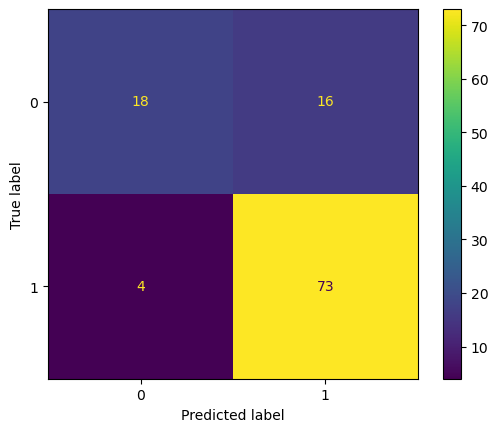

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df['Loan_Status_Y'].unique()).plot()
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.53      0.64        34
           1       0.82      0.95      0.88        77

    accuracy                           0.82       111
   macro avg       0.82      0.74      0.76       111
weighted avg       0.82      0.82      0.81       111



<Axes: xlabel='Loan_Status_Y'>

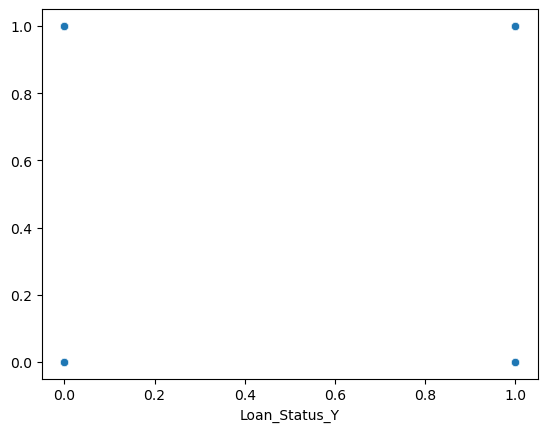

In [64]:
sns.scatterplot(x = y_test, y = ypred_test)